In [12]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# reads the data from the file

#df = pd.read_csv('/Users/kaidenjones/Desktop/localify_lab4_data.tsv', sep='\t')
df = pd.read_csv('/Users/cymoar/COMP-ML/Labs/ML-Lab4/localify_music_genre-song_dataset_short_limited.tsv', sep='\t')

# Slpits the data into training and validation data
df_training = df.iloc[:8000]
df_validation = df.iloc[8000:]

# spit the data into labels, X, y
training_label_df = df_training[['song_name','artist_name']]
tensor_label = tf.convert_to_tensor(training_label_df)
training_X_df = df_training[['acousticness','danceability','energy','instrumentalness',
                             'liveness','loudness','speechiness','tempo','valence']]
tensor_training_X = tf.convert_to_tensor(training_X_df)
training_y_df = df_training[['genre_name','Unnamed: 12']]

# tensor_training_y1 = tf.convert_to_tensor(training_y_df[['genre_name']])
tensor_training_y = tf.convert_to_tensor(training_y_df[['Unnamed: 12']], dtype=tf.float32)
tty2 = tf.convert_to_tensor(training_y_df[['Unnamed: 12']])
vector_y = tf.reshape(tty2, [8000])

validation_label_df = df_validation[['song_name','artist_name']]
validation_X_df = df_validation[['acousticness','danceability','energy','instrumentalness','liveness',
                                 'loudness','speechiness','tempo','valence']]
validation_y_df = df_validation[['genre_name','Unnamed: 12']]

tensor_validation_X = tf.convert_to_tensor(validation_X_df)
training_y_df = df_training[['genre_name','Unnamed: 12']]

# tensor_training_y1 = tf.convert_to_tensor(training_y_df[['genre_name']])
tensor_validation_y = tf.convert_to_tensor(validation_y_df[['Unnamed: 12']], dtype=tf.float32)
tvy2 = tf.convert_to_tensor(validation_y_df[['Unnamed: 12']])
validation_vector_y = tf.reshape(tvy2, [2000])

In [14]:
# Model archecture
# model = Sequential([
#     Dense(units=25, activation="relu"),
#     Dense(units=15, activation="relu"),
#     Dense(units=10 , activation="linear")])

new_lambda_value = .0001

# model = Sequential([
#     Dense(units=10, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=20, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=30, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=40, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=50, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=50, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=40, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=30, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=20, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=10 , activation="linear", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value))])

# model = Sequential([
#     Dense(units=50, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=50, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=50, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=30, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=30, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=30, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=20, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=20, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=20, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=10 , activation="linear", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value))])

model = Sequential([
    Dense(units=50, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
    Dense(units=50, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
    Dense(units=50, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
    Dense(units=50, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
    Dense(units=50, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
    Dense(units=50, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
    Dense(units=50, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
    Dense(units=50, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
    Dense(units=50, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
    Dense(units=10 , activation="linear", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value))])

In [15]:
# gets the loss
#optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [16]:
# makes the model fit
model.fit(tensor_training_X, tensor_training_y, epochs=250)

Epoch 1/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 852us/step - accuracy: 0.1438 - loss: 2.3343
Epoch 2/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.1655 - loss: 2.2446
Epoch 3/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.1719 - loss: 2.2317
Epoch 4/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.1781 - loss: 2.2166
Epoch 5/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.1868 - loss: 2.1951
Epoch 6/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.1812 - loss: 2.1978
Epoch 7/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.1823 - loss: 2.1863
Epoch 8/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.1929 - loss: 2.1849
Epoch 9/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.2049 - loss: 2.1721
Epoch 10/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.1920 - loss: 2.1648
Epoch 11/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.2039 - loss: 2.1580
Epoch 12/250
250/25

In [17]:
# gets the predictions of the model
logits = model(tensor_training_X)
f_x = tf.nn.softmax(logits)

In [18]:
print(f_x)

tf.Tensor(
[[0.08759933 0.06719324 0.12215807 ... 0.12522814 0.01300244 0.10107797]
 [0.26581827 0.07874813 0.01687966 ... 0.07038933 0.19285604 0.01133525]
 [0.17675474 0.10718465 0.02090289 ... 0.04879039 0.07485218 0.02212294]
 ...
 [0.06528913 0.21805038 0.01258801 ... 0.01623285 0.01687204 0.13895798]
 [0.24366844 0.14351347 0.00974235 ... 0.06560304 0.13465922 0.09419019]
 [0.25228682 0.03025906 0.0221631  ... 0.18684526 0.25720164 0.03161696]], shape=(8000, 10), dtype=float32)


In [19]:
predictions = tf.argmax(f_x, axis=1)
sum_vector = tf.reduce_sum(predictions)

In [20]:
correct_predictions = tf.equal(predictions, vector_y)
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
print(correct_predictions)
print(accuracy)
print(vector_y)

tf.Tensor([False  True False ... False False  True], shape=(8000,), dtype=bool)
tf.Tensor(0.354625, shape=(), dtype=float32)
tf.Tensor([0 0 0 ... 5 8 8], shape=(8000,), dtype=int64)


In [21]:
conf_matrix = tf.math.confusion_matrix(labels=vector_y, predictions=predictions)
print(conf_matrix)

tf.Tensor(
[[352 190  70 177   8  14  80  80 107  77]
 [125 409  40 158  11  28  57  21   9  86]
 [ 33   8 650  27   1   7  81  42   2   3]
 [ 83 193  19 344   4  13  39  24   6  15]
 [220 171  34 114  10  14  42  37  48  47]
 [ 77 156 121 138   2  67 137  53   6  46]
 [ 76 104 207  96   2  46 179  48   1  32]
 [145  27 111  53   2  13  76 278  16  45]
 [113  17  15  53   1   8   8  40 254   9]
 [ 39 179  32  42   1  33  30  40   2 294]], shape=(10, 10), dtype=int32)


In [26]:
# testing the cross validation set:
logits = model(tensor_validation_X)
f_x = tf.nn.softmax(logits)

validation_predictions = tf.argmax(f_x, axis=1)

correct_predictions = tf.equal(validation_predictions, validation_vector_y)
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
print(correct_predictions)
print(accuracy)
print(validation_vector_y)

tf.Tensor([ True  True False ... False False False], shape=(2000,), dtype=bool)
tf.Tensor(0.287, shape=(), dtype=float32)
tf.Tensor([8 8 0 ... 6 6 6], shape=(2000,), dtype=int64)


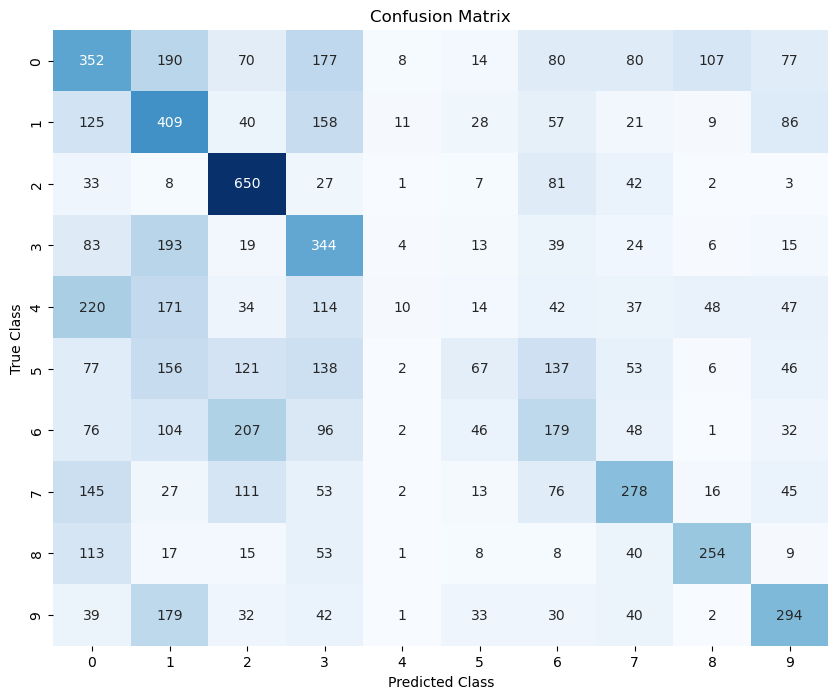

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()